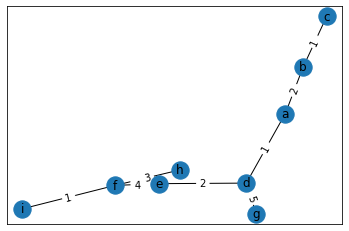

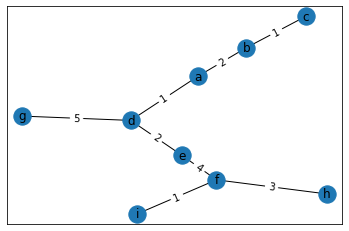

In [18]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict

from fibheap import FibonacciHeap


def prims(graph: nx.Graph) -> nx.Graph:
    f = set()
    dist = {v: float("inf") for v in graph}
    dist[list(graph.nodes())[0]] = 0
    prev = dict()
    unvisited = [(dist[n], n) for n in graph]
    heapq.heapify(unvisited)
    while len(unvisited):
        current = heapq.heappop(unvisited)[1]
        f.add(current)
        for n in graph[current]:
            if n in f:
                continue
            l = graph[current][n]['weight']
            if l < dist[n]:
                dist[n] = l
                prev[n] = current
        unvisited = [(dist[v], v) for v in graph if not v in f]
        heapq.heapify(unvisited)
    spanning_tree = nx.Graph()
    for k, v in prev.items():
        spanning_tree.add_edge(k, v, weight=graph[k][v]["weight"])
    return spanning_tree

def prims_fibheap(graph: nx.Graph) -> nx.Graph:
    f = set()
    prev = dict()

    unvisited_heap = FibonacciHeap()
    dist: Dict[str, FibonacciHeap.Node] = {n: unvisited_heap.insert(float("inf"), n) for n in graph.nodes()}
    first_node = dist[list(graph.nodes())[0]]
    unvisited_heap.decrease_key(first_node, 0)

    while unvisited_heap.find_min():
        current = unvisited_heap.extract_min().value
        f.add(current)
        for n in graph[current]:
            if n in f:
                continue
            l = graph[current][n]['weight']
            if l < dist[n].value:
                unvisited_heap.decrease_key(dist[n], l)
                prev[n] = current

    spanning_tree = nx.Graph()
    for k, v in prev.items():
        spanning_tree.add_edge(k, v, weight=graph[k][v]["weight"])
    return spanning_tree


G1 = nx.Graph()

G1.add_edge("a", "b", weight=2)
G1.add_edge("a", "d", weight=1)
G1.add_edge("b", "c", weight=1)
G1.add_edge("b", "e", weight=2)
G1.add_edge("b", "d", weight=3)
G1.add_edge("c", "e", weight=2)
G1.add_edge("c", "f", weight=7)
G1.add_edge("d", "e", weight=2)
G1.add_edge("d", "g", weight=5)
G1.add_edge("e", "g", weight=5)
G1.add_edge("e", "f", weight=4)
G1.add_edge("e", "h", weight=5)
G1.add_edge("g", "h", weight=5)
G1.add_edge("f", "h", weight=3)
G1.add_edge("f", "i", weight=1)
G1.add_edge("h", "i", weight=3)

sp = prims_fibheap(G1)

pos = nx.spring_layout(sp)  # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(sp, pos)
labels = nx.get_edge_attributes(sp, 'weight')
nx.draw_networkx_edge_labels(sp, pos, edge_labels=labels)
plt.show()

working_sp = nx.minimum_spanning_tree(G1, algorithm="prim", weight="weight", ignore_nan=False)

pos = nx.spring_layout(working_sp)  # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(working_sp, pos)
labels = nx.get_edge_attributes(working_sp, 'weight')
nx.draw_networkx_edge_labels(working_sp, pos, edge_labels=labels)
plt.show()
